#### 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

 **1. Problem definition**
How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

**2. Data**
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

**There are 3 main datasets:**

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
**3. Evaluation**
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

**4. Features**
Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
#Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

In [2]:
#Import data

df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [6]:
#### Check percentage of missing columns
def missing_cols(df):
    df = df.isnull().sum()/len(df)
    return df

In [7]:
missing_cols(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

### Lets visualize some columns and check the distributions 

Since we are predicting the SalesPrice, this will be the "Target" column

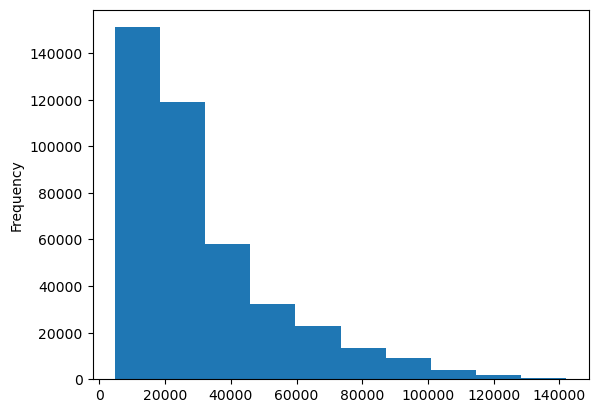

In [8]:
#Visualize distribution of the SalePrice column - Target

df.SalePrice.plot.hist()
plt.show()

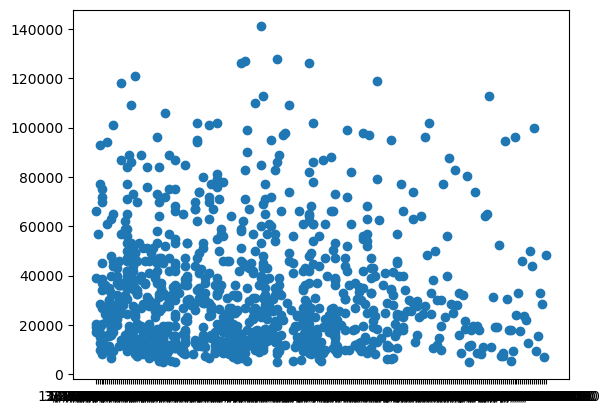

In [9]:
# Saledate VS SalePrice

fig, ax=plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.show()

In [10]:
#Steering_Controls

df["Steering_Controls"].value_counts()

Steering_Controls
Conventional           70774
Command Control          594
Four Wheel Standard      139
Wheel                     14
No                         1
Name: count, dtype: int64

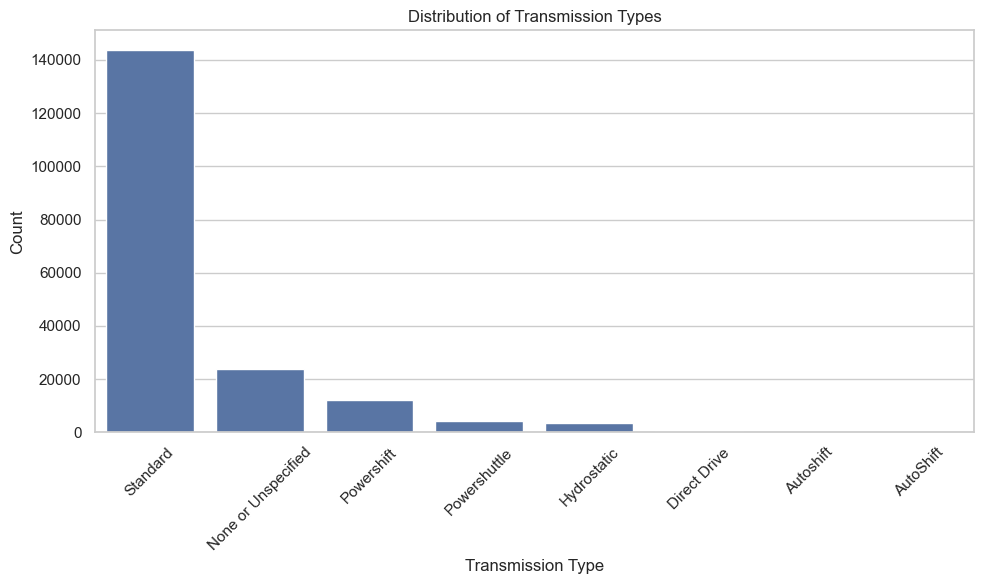

In [11]:

# Set aesthetic style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Transmission", order=df["Transmission"].value_counts().index)

# Customize labels and title
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.title("Distribution of Transmission Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Convert the date column to a datetime

In [12]:
df["saledate"] = pd.to_datetime(df["saledate"], errors='coerce')

In [13]:
df["saledate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 412698 entries, 0 to 412697
Series name: saledate
Non-Null Count   Dtype         
--------------   -----         
412698 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.1 MB


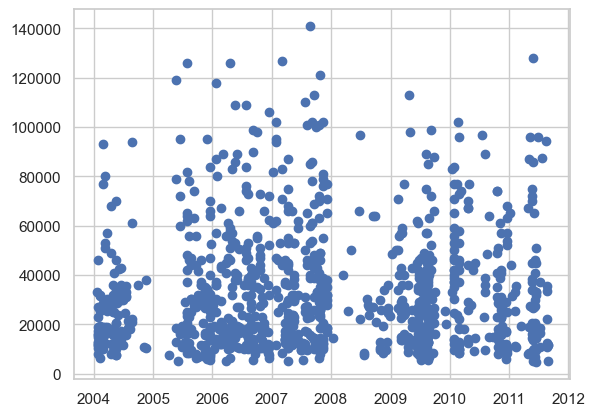

In [14]:
# Now we can visualize the Saledate VS SalePrice again


fig, ax=plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.show()

In [15]:
#Create a copy of our dataFrame before goung ahead

df_backup = df.copy()

In [16]:
# df_backup.info()

### Treat inconsistencies in DataType

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [18]:
# Lets feature engineer date column
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day

In [19]:
# df.info()

In [20]:
#Drop original saledate since we have broken it down into Year, Month and Day

df.drop("saledate", axis=1, inplace=True)

### Dealing with Object datatype

It is essential we convert this as object datatype is ambiguous and could be one of three types:

1. Strings - Just textual items and no order to them
2. Category - Textual Ordered items
3. Mixed data - Mixed datatypes

In [21]:
# Seperate the Object dtype

# obj_cols = df.select_dtypes(include='object').columns.tolist() #To view as a list
obj_cols = df.select_dtypes(include=object)

string_like=[]
non_string_object=[]
for col in obj_cols:
    #Count how many entries are strings
    string_count = df[col].apply(lambda x: isinstance(x, str)).sum()
    total_count = df[col].notna().sum()

    if string_count == total_count:
        string_like.append(col)
    else:
        non_string_object.append(col)

# Check which are categorical
categorical_like = [col for col in obj_cols if isinstance(df[col].dtype, pd.CategoricalDtype)]


In [22]:
print("✅ Pure string-like columns:", string_like)

print("⚠️ Mixed or non-string object columns:", non_string_object)

print("Categorical columns:", categorical_like)

✅ Pure string-like columns: ['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']
⚠️ Mixed or non-string object columns: []
Categorical columns: []


In [23]:
for col in string_like:
    df[col] = df[col].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

### Dealing with Missing Data

In [25]:
# df.info()

##### Fill Numerical values first

In [26]:
#list all numerical columns
num_cols = df.select_dtypes(include=['float64', 'int32', 'int64'])

#Return all numerical columns that are not null
missing_ratio = num_cols.isnull().sum()/len(num_cols)
missing_cols = missing_ratio[missing_ratio > 0.0].index.tolist()
missing_cols

['auctioneerID', 'MachineHoursCurrentMeter']

In [27]:
# Lets fill the columns above with the median, lets write a function to do this

def fill_with_median(df, columns):
    for col in columns:
        df[col] = df[col].fillna(df[col].median())
    return df

In [28]:
df = fill_with_median(df, ["auctioneerID", "MachineHoursCurrentMeter"])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              412698 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  412698 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [30]:
num_cols = df.select_dtypes(include=['float64', 'int32', 'int64'])
list(num_cols)

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'saleYear',
 'saleMonth',
 'saleDay']

In [31]:
num_cols.isnull().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
saleYear                    0
saleMonth                   0
saleDay                     0
dtype: int64

##### Treat catgerical next

In [32]:
# Checking columns that aren't numerical

# for label, content in df_train.items():
#     if not pd.api.types.is_numeric_dtype(content):
#         print(label)

In [33]:
# non_numeric_cols = df_train.select_dtypes(exclude='number').columns.tolist()
# list(non_numeric_cols)


# # Wrap in a function
# def get_non_numeric_columns(df):
#     return df.select_dtypes(exclude='number').columns.tolist()

# # Usage
# non_numeric_cols = get_non_numeric_columns(df_train)
# non_numeric_cols

In [34]:
def encode_categoricals(df):
    non_numeric_cols = df.select_dtypes(exclude='number').columns
    for col in non_numeric_cols:
        df[col + "_is_missing"] = df[col].isna()
        df[col] = pd.Categorical(df[col]).codes + 1
    return df

In [35]:
df = encode_categoricals(df)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 99 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SalesID                             412698 non-null  int64  
 1   SalePrice                           412698 non-null  float64
 2   MachineID                           412698 non-null  int64  
 3   ModelID                             412698 non-null  int64  
 4   datasource                          412698 non-null  int64  
 5   auctioneerID                        412698 non-null  float64
 6   YearMade                            412698 non-null  int64  
 7   MachineHoursCurrentMeter            412698 non-null  float64
 8   UsageBand                           412698 non-null  int8   
 9   fiModelDesc                         412698 non-null  int16  
 10  fiBaseModel                         412698 non-null  int16  
 11  fiSecondaryDesc           

In [37]:
# Lets export cleaned data and save it as it is now
df.to_csv("data/df_cleaned.csv", index=False)

### Modelling 

In [38]:

%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df.drop("SalePrice", axis=1), df["SalePrice"])

CPU times: user 8min 47s, sys: 2.05 s, total: 8min 49s
Wall time: 57.4 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [39]:
# Score the model
model.score(df.drop("SalePrice", axis=1), df["SalePrice"])

0.9875223878228414

### Splitting data into train/validation sets

In [40]:
# Split data into training and validation
df_val = df[df.saleYear == 2012]
df_train = df[df.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [41]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 98), (401125,), (11573, 98), (11573,))

In [42]:
y_train

0         66000.0
1         57000.0
2         10000.0
3         38500.0
4         11000.0
           ...   
401120    10500.0
401121    11000.0
401122    11500.0
401123     9000.0
401124     7750.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation function

In [43]:
# Create evaluation function (the competition uses RMSLE)

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

In [44]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [45]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

CPU times: user 20.5 s, sys: 152 ms, total: 20.7 s
Wall time: 2.3 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [46]:
show_scores(model)

{'Training MAE': 5522.284837494547,
 'Valid MAE': 7087.336180765576,
 'Training RMSLE': np.float64(0.2563337282353622),
 'Valid RMSLE': np.float64(0.2902273274346365),
 'Training R^2': 0.8623244743908169,
 'Valid R^2': 0.8346443518263377}

### Hyerparameter tuning with RandomizedSearchCV

In [47]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]
           # "max_samples": None
          }

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 54.4 s, sys: 683 ms, total: 55.1 s
Wall time: 8.19 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [48]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': np.int64(20),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(15),
 'max_features': 'sqrt',
 'max_depth': None}

In [49]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6213.56279123273,
 'Valid MAE': 7589.26847324764,
 'Training RMSLE': np.float64(0.28093126896027804),
 'Valid RMSLE': np.float64(0.3107461435555298),
 'Training R^2': 0.834374381351449,
 'Valid R^2': 0.8153833060650205}

### Train a model with the best hyperparamters
**Note**: These were found after 100 iterations of RandomizedSearchCV.

In [50]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=20,
                                    min_samples_leaf=13,
                                    min_samples_split=12,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 36.1 s, sys: 123 ms, total: 36.3 s
Wall time: 4.03 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=13,
                      min_samples_split=12, n_estimators=20, n_jobs=-1,
                      random_state=42)

In [51]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 4169.459007114189,
 'Valid MAE': 6084.302003289147,
 'Training RMSLE': np.float64(0.19769776021482258),
 'Valid RMSLE': np.float64(0.24739095496442975),
 'Training R^2': 0.9179614562450544,
 'Valid R^2': 0.8728319337184951}

### Make predictions on test data

In [52]:
# Import the test data
df_test = pd.read_csv("data/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [53]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [54]:
# Process the test data 
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [55]:

# Make predictions on updated test data
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- MachineHoursCurrentMeter_is_missing
- saleDayOfWeek
- saleDayOfYear


In [56]:

X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,999089,3157,121,3.0,2004,68.0,2,963,298,...,True,True,True,True,True,True,True,True,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,2,1745,529,...,True,True,True,True,True,True,True,True,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,336,111,...,True,True,True,True,True,True,True,True,True,True
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3716,1381,...,True,True,True,True,True,True,True,True,True,True
4,1139253,1057373,17311,121,3.0,2007,722.0,3,4261,1538,...,True,True,True,True,True,True,True,True,True,True


In [57]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

set()

In [58]:
list(df_test.columns)

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear',
 'MachineHoursCurrentMeter_is_missing',
 'UsageBand_is_missing',
 '

In [59]:
# X_train.info()

In [60]:
df_test.drop(['MachineHoursCurrentMeter_is_missing', 'saleDayOfWeek', 'saleDayOfYear'], axis=1, inplace=True)

In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 98 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalesID                             12457 non-null  int64  
 1   MachineID                           12457 non-null  int64  
 2   ModelID                             12457 non-null  int64  
 3   datasource                          12457 non-null  int64  
 4   auctioneerID                        12457 non-null  int64  
 5   YearMade                            12457 non-null  int64  
 6   MachineHoursCurrentMeter            12457 non-null  float64
 7   UsageBand                           12457 non-null  int8   
 8   fiModelDesc                         12457 non-null  int16  
 9   fiBaseModel                         12457 non-null  int16  
 10  fiSecondaryDesc                     12457 non-null  int8   
 11  fiModelSeries                       12457

In [62]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [63]:
test_preds

array([18441.29539058, 15331.14894361, 53668.95349677, ...,
       12966.06608084, 17611.71689652, 24908.28585858])

In [64]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,18441.295391
1,1227844,15331.148944
2,1227847,53668.953497
3,1227848,68495.469353
4,1227863,48555.494966
...,...,...
12452,6643171,37719.115966
12453,6643173,12243.832060
12454,6643184,12966.066081
12455,6643186,17611.716897


In [65]:

# Export prediction data
df_preds.to_csv("data/test_predictions.csv", index=False)

### Feature Importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (SalePrice).

In [66]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([2.89541896e-02, 1.26084448e-02, 4.19043724e-02, 1.80609428e-03,
       1.78008822e-03, 2.10553449e-01, 2.04187454e-03, 5.41324006e-04,
       4.10207011e-02, 4.26193509e-02, 6.83219081e-02, 3.65532284e-03,
       1.95318861e-02, 1.33154091e-01, 5.17648198e-02, 3.31362262e-03,
       3.92520529e-03, 2.60297008e-03, 2.82023167e-03, 7.39160171e-02,
       4.39688208e-04, 1.96648804e-05, 6.84430781e-04, 1.38444389e-04,
       7.96031150e-04, 1.08602281e-05, 3.31230803e-07, 8.51885024e-03,
       2.55015960e-04, 9.78465099e-04, 1.99370307e-03, 7.73476183e-04,
       3.72326761e-03, 9.89199492e-05, 4.23584288e-03, 1.21809468e-02,
       5.24213760e-04, 1.61407516e-02, 1.88702504e-03, 2.02539629e-03,
       4.47060552e-04, 8.08224965e-04, 5.51503983e-04, 3.76975321e-04,
       4.90058722e-04, 1.24910828e-04, 2.88998310e-04, 1.79159001e-03,
       1.54965392e-03, 2.07438773e-04, 1.21363162e-04, 7.44115950e-02,
       5.05836527e-03, 2.70614678e-03, 1.99652071e-04, 0.00000000e+00,
      

In [67]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

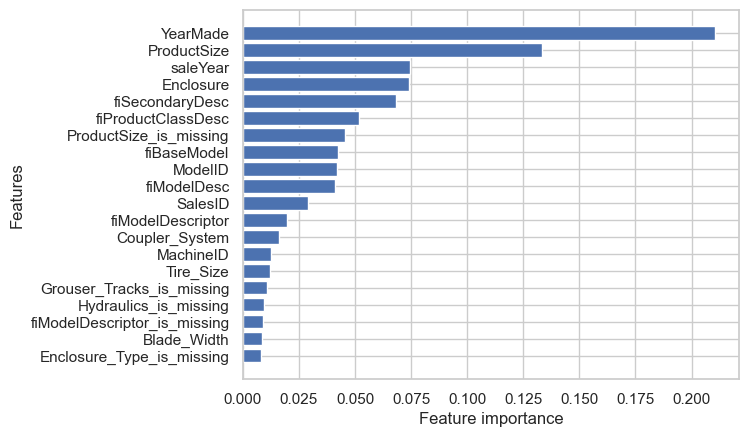

In [70]:

plot_features(X_train.columns, ideal_model.feature_importances_)
plt.show()

In [71]:
df["Enclosure"].value_counts()

Enclosure
6    177971
1    141769
3     92601
0       334
2        18
4         3
5         2
Name: count, dtype: int64